# Avatar questionnaire processing  

## Import packages 

In [1]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.anova import *
from functools import reduce

## Function creation

1. extraRow: Creates a function that takes:
 - **df** = a data frame and checks if any of the elements of 
 - **yourlist** have a partial match with the content of the values of 
 - **variable** your variable of interest, if so it assigns the correspondedn matching value to 
 - **newvariable** the name of variable you want as an output 


In [2]:
def extraRow(df,yourlist,variable,newVariable):
    '''Creates a new variable that contains matching data from preexiting variable
    
Parameters
-------------
     
     df: your data frame,
     yourlist: List of values you want to target for the partial match search
     variable: Variable that may cointain the elements on yourlist
     newvariable: Name for  New Variable 
     
returns 
----------

    DataFrame
     '''
    for idx, row in df.iterrows():
        for l in yourlist:
            if l in row[variable]:
                df.loc[idx, newVariable] = l

## Preprocessing 

In [3]:
# Data set loading
df_file = '/Volumes/Extreme SSD/HumanA/Data/Data_Tracy/Questionnaires/AvaQuest.csv'
df = pd.read_csv(df_file, sep= ',', header=None)
df.head()

,0,1,2,3
0,1,Remember_01_CmA,1,9627
1,1,Realistic_01_CmA,5,9627
2,1,Attractive_01_CmA,1,9627
3,2,Remember_29_Sa,1,9627
4,2,Realistic_29_Sa,4,9627


In [4]:
df = df.rename({0: 'order', 1: 'item', 2: 'likert', 3: 'ID'}, axis=1)
df.head()

,order,item,likert,ID
0,1,Remember_01_CmA,1,9627
1,1,Realistic_01_CmA,5,9627
2,1,Attractive_01_CmA,1,9627
3,2,Remember_29_Sa,1,9627
4,2,Realistic_29_Sa,4,9627


In [5]:
#Initial exploration of the data set 
df.item = df['item'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   order   3360 non-null   int64   
 1   item    3360 non-null   category
 2   likert  3360 non-null   int64   
 3   ID      3360 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 90.8 KB


In [6]:
#Creating Clarity Categorical variable 
df['avatarCat'] = df['item'].str.contains('Sa')
df.loc[:, 'avatarCategory'] = df['avatarCat'].replace({True: 'Passive', False: 'Active'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order           3360 non-null   int64   
 1   item            3360 non-null   category
 2   likert          3360 non-null   int64   
 3   ID              3360 non-null   int64   
 4   avatarCat       3360 non-null   bool    
 5   avatarCategory  3360 non-null   object  
dtypes: bool(1), category(1), int64(3), object(1)
memory usage: 120.4+ KB


In [7]:
df.head()

,order,item,likert,ID,avatarCat,avatarCategory
0,1,Remember_01_CmA,1,9627,False,Active
1,1,Realistic_01_CmA,5,9627,False,Active
2,1,Attractive_01_CmA,1,9627,False,Active
3,2,Remember_29_Sa,1,9627,True,Passive
4,2,Realistic_29_Sa,4,9627,True,Passive


In [8]:
#Checking that value counts for Action and Standing avatars corresponds with the number of participants
df.avatarCat.value_counts()

False    1680
True     1680
Name: avatarCat, dtype: int64

In [9]:
#List of values for iteration search 
itemCat = ['Remember','Realistic', 'Attractive']

#Searching for a partial string 'ItemCat' in variable 'Item' to creat a new variable 'ItemCat'
extraRow(df,itemCat,'item','itemCategory')
df.tail(5)

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory
3355,55,Realistic_06_CmA,3,3540,False,Active,Realistic
3356,55,Attractive_06_CmA,1,3540,False,Active,Attractive
3357,56,Remember_56_Sa,2,3540,True,Passive,Remember
3358,56,Realistic_56_Sa,4,3540,True,Passive,Realistic
3359,56,Attractive_56_Sa,2,3540,True,Passive,Attractive


In [10]:
#Extracting the Avatar number from the variable 'Item'
AvaIDs = []
for idx, row in df.iterrows():
    num = re.findall(r'\d+', row['item']) 
    AvaIDs.append(num)
    #Flatten the list: Every number was returned as a list of it's own with this we get one unified list
    avatarIDsf = [item for sublist in AvaIDs for item in sublist]


In [11]:
#Searching for a partial string contained in the lists "AvatarIDsf" in variable "Item" to creat a new variable "AvatarID"
extraRow(df,avatarIDsf,'item','avatarID')
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,1,9627,False,Active,Remember,01
1,1,Realistic_01_CmA,5,9627,False,Active,Realistic,01
2,1,Attractive_01_CmA,1,9627,False,Active,Attractive,01
3,2,Remember_29_Sa,1,9627,True,Passive,Remember,29
4,2,Realistic_29_Sa,4,9627,True,Passive,Realistic,29


In [12]:
wide = df.pivot(index='ID', columns='item', values='likert')

In [13]:
os.chdir('/Volumes/Extreme SSD/HumanA/Data/Data_Tracy/Questionnaires/Adjusted')
df.to_csv('CompleteLargeAvatarQues.cvs')

# Descriptives 

In [14]:
#Average values Support and clarity 
df.groupby([ 'ID', 'avatarCategory','itemCategory'])['likert'].mean()

ID    avatarCategory  itemCategory
1031  Active          Attractive      3.321429
                      Realistic       4.428571
                      Remember        3.892857
      Passive         Attractive      2.678571
                      Realistic       4.107143
                                        ...   
9627  Active          Realistic       4.857143
                      Remember        2.357143
      Passive         Attractive      1.464286
                      Realistic       4.392857
                      Remember        1.142857
Name: likert, Length: 120, dtype: float64

In [15]:
#Average values Support and clarity 
df.groupby(['ID','avatarCategory','itemCategory'])['likert'].describe().sort_values(by='mean')

,,,count,mean,std,min,25%,50%,75%,max
ID,avatarCategory,itemCategory,,,,,,,,
6406,Passive,Attractive,28.0,1.035714,0.188982,1.0,1.0,1.0,1.0,2.0
9627,Passive,Remember,28.0,1.142857,0.524531,1.0,1.0,1.0,1.0,3.0
6406,Passive,Remember,28.0,1.178571,0.669636,1.0,1.0,1.0,1.0,4.0
5851,Passive,Remember,28.0,1.357143,0.621485,1.0,1.0,1.0,2.0,3.0
4580,Passive,Attractive,28.0,1.357143,0.621485,1.0,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7935,Active,Attractive,28.0,4.285714,1.242970,1.0,4.0,5.0,5.0,5.0
9627,Passive,Realistic,28.0,4.392857,0.628890,3.0,4.0,4.0,5.0,5.0
7935,Active,Realistic,28.0,4.428571,1.259882,1.0,5.0,5.0,5.0,5.0


In [16]:
AvatarIDsL = df.pivot_table('likert',  'avatarID').sort_values(by='likert')
AvatarIDsL

,likert
avatarID,
21,1.733333
39,1.750000
37,1.766667
45,1.766667
47,1.983333
55,1.983333
51,2.000000
31,2.016667
30,2.066667


## Data Visualization

In [17]:
# General seaborn design settings
sns.set_palette("colorblind")
sns.set_style("white")
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)

Text(0.5, 0, 'Question category')

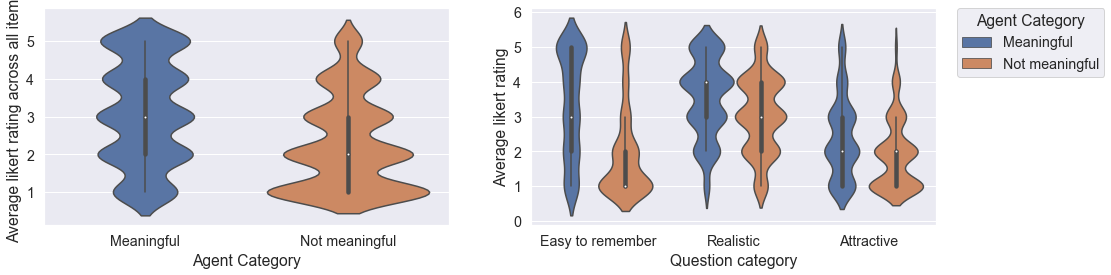

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

sns.violinplot(data= df, x='avatarCategory', y='likert', ax=axes[0])
axes[0].set_xticklabels(['Meaningful', 'Not meaningful'])
axes[0].set_xlabel('Agent Category')
axes[0].set_ylabel('Average likert rating across all items')

sns.violinplot(data= df, x='itemCategory', y='likert', hue= 'avatarCategory',  ax=axes[1])
#Getting the legend components in order to not lose color when reassigning labels
handles, labels = axes[1].get_legend_handles_labels()
labels = ['Meaningful', 'Not meaningful']
axes[1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Agent Category')
axes[1].set_xticklabels(['Easy to remember', 'Realistic', 'Attractive'])
axes[1].set_ylabel('Average likert rating')
axes[1].set_xlabel('Question category')

Text(0.5, 0, 'Question category')

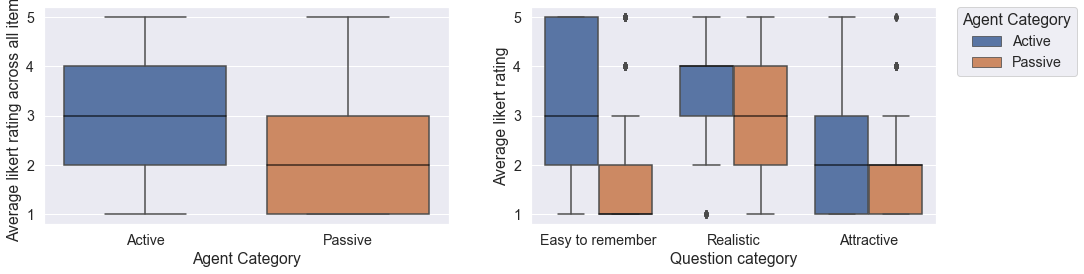

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

sns.boxplot(data= df, x='avatarCategory', y='likert',   medianprops=dict(color="black", alpha=0.7), ax=axes[0])
axes[0].set_xticklabels(['Active', 'Passive'])
axes[0].set_xlabel('Agent Category')
axes[0].set_ylabel('Average likert rating across all items')

sns.boxplot(data= df, x='itemCategory', y='likert', hue= 'avatarCategory', medianprops=dict(color="black", alpha=0.7), ax=axes[1])
#Getting the legend components in order to not lose color when reassigning labels
handles, labels = axes[1].get_legend_handles_labels()
labels = ['Active', 'Passive']
axes[1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Agent Category')
axes[1].set_xticklabels(['Easy to remember', 'Realistic', 'Attractive'])
axes[1].set_ylabel('Average likert rating')
axes[1].set_xlabel('Question category')

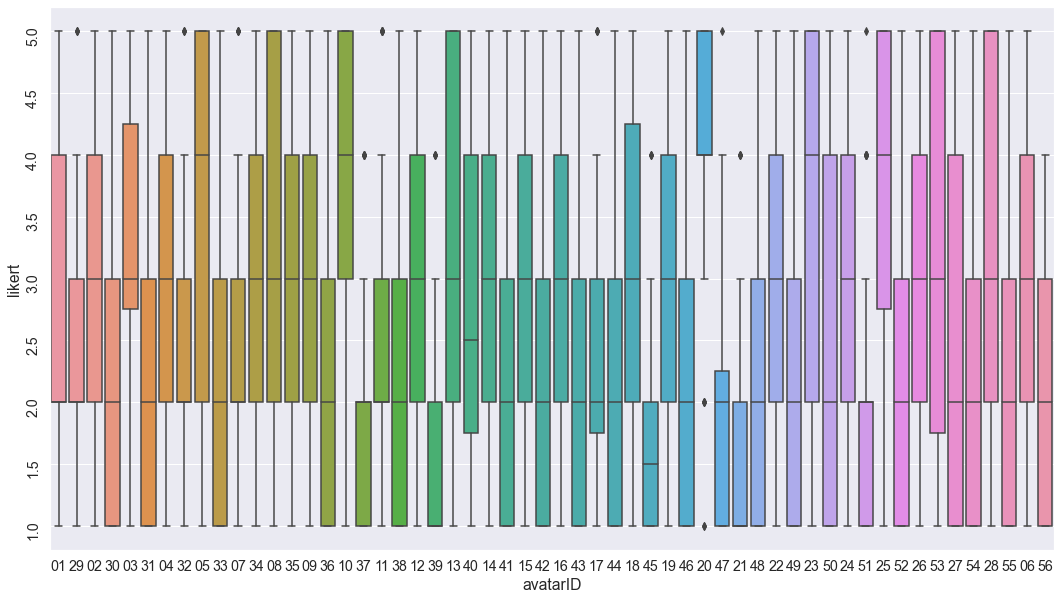

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,10))
sns.boxplot(data= df, x='avatarID', y='likert')
plt.yticks(rotation=90)
plt.show()

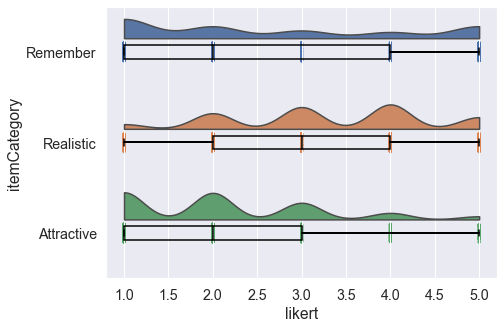

In [21]:
dy='itemCategory'; dx='likert'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
               saturation = 1, orient = ort) 

## Data analysis

In [22]:
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,1,9627,False,Active,Remember,01
1,1,Realistic_01_CmA,5,9627,False,Active,Realistic,01
2,1,Attractive_01_CmA,1,9627,False,Active,Attractive,01
3,2,Remember_29_Sa,1,9627,True,Passive,Remember,29
4,2,Realistic_29_Sa,4,9627,True,Passive,Realistic,29


/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


-inf 1.0
nan


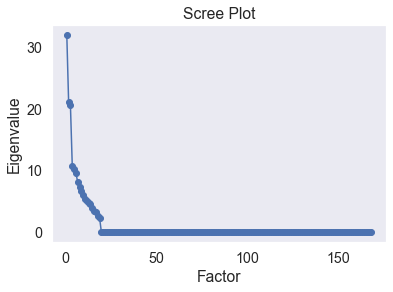

In [23]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Droppin Nas
wide.dropna(inplace=True);

#Adecuacy test

#Barlets sphericity: A significative p value indicates the date is different from an identity matrix
chi_square_value, p_value = calculate_bartlett_sphericity(wide)
print(chi_square_value, p_value)

# Kaiser-Meyer-Olkin (KMO): Estimates the proportion of variance among all observed variables, less than 0.6 is inadequate
kmo_all, kmo_model = calculate_kmo(wide)
print(kmo_model)
#Create factor analysis object and perform analysis
fa = FactorAnalyzer(rotation='varimax')
fa.fit(wide)

loadings = fa.loadings_

# Get the eigenvector
ev, v = fa.get_eigenvalues()

xvals = range(1, wide.shape[1] + 1)
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [24]:
wide = pd.DataFrame(wide)
wide.describe()

item,Attractive_01_CmA,Attractive_02_CmA,Attractive_03_CmA,Attractive_04_CmA,Attractive_05_CmA,Attractive_06_CmA,Attractive_07_CmA,Attractive_08_CmA,Attractive_09_CmA,Attractive_10_CmA,...,Remember_47_Sa,Remember_48_Sa,Remember_49_Sa,Remember_50_Sa,Remember_51_Sa,Remember_52_Sa,Remember_53_Sa,Remember_54_Sa,Remember_55_Sa,Remember_56_Sa
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,2.000000,3.050000,2.600000,2.850000,2.300000,2.700000,1.950000,2.450000,2.800000,3.150000,...,1.450000,2.30000,2.300000,1.700000,2.050000,1.450000,4.65000,1.550000,1.700000,1.350000
std,1.123903,1.356272,0.994723,1.182103,0.864505,0.978721,0.887041,1.190975,1.196486,1.136708,...,0.759155,1.41793,1.454575,1.080935,1.316894,1.099043,0.74516,0.887041,1.080935,0.587143
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.750000,2.000000,2.750000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.500000,3.000000,3.000000,...,1.000000,2.00000,2.000000,1.000000,1.500000,1.000000,5.00000,1.000000,1.000000,1.000000
75%,2.250000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.250000,4.000000,...,2.000000,3.25000,3.000000,2.000000,3.000000,1.000000,5.00000,2.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,...,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,4.000000,5.000000,3.000000


In [25]:
kmo_model

nan

In [26]:
from statsmodels.stats.anova import AnovaRM
help(AnovaRM)

Help on class AnovaRM in module statsmodels.stats.anova:

class AnovaRM(builtins.object)
 |  AnovaRM(data, depvar, subject, within=None, between=None, aggregate_func=None)
 |  
 |  Repeated measures Anova using least squares regression
 |  
 |  The full model regression residual sum of squares is
 |  used to compare with the reduced model for calculating the
 |  within-subject effect sum of squares [1].
 |  
 |  Currently, only fully balanced within-subject designs are supported.
 |  Calculation of between-subject effects and corrections for violation of
 |  sphericity are not yet implemented.
 |  
 |  Parameters
 |  ----------
 |  data : DataFrame
 |  depvar : str
 |      The dependent variable in `data`
 |  subject : str
 |      Specify the subject id
 |  within : list[str]
 |      The within-subject factors
 |  between : list[str]
 |      The between-subject factors, this is not yet implemented
 |  aggregate_func : {None, 'mean', callable}
 |      If the data set contains more than 

<AxesSubplot: title={'center': 'likert'}, xlabel='[avatarCategory, itemCategory]'>

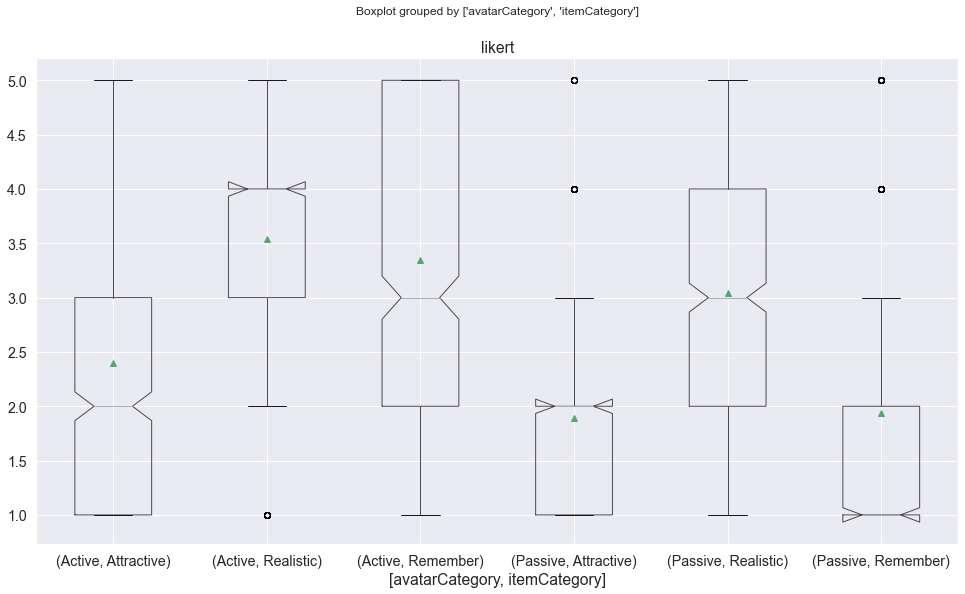

In [27]:
df.boxplot(["likert"], by = ["avatarCategory", "itemCategory"],
           figsize = (16, 9),
           showmeans = True,
           notch = True)

In [28]:
# Separete data set into question category's
df1 = df[df['itemCategory']== 'Remember']
df2 = df[df['itemCategory']== 'Attractive']
df3 = df[df['itemCategory']== 'Realistic']
df1.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,1,9627,False,Active,Remember,01
3,2,Remember_29_Sa,1,9627,True,Passive,Remember,29
6,3,Remember_02_CmA,3,9627,False,Active,Remember,02
9,4,Remember_30_Sa,1,9627,True,Passive,Remember,30
12,5,Remember_03_CmA,5,9627,False,Active,Remember,03


In [29]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot = pd.DataFrame(df1.groupby([ 'ID', 'avatarCategory'])['likert'].mean())
#Reformat to a wide dataframe
AvatarSum = pd.DataFrame(Topivot.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum.reset_index(drop=True)

avatarCategory,Active,Passive
0,3.892857,2.750000
1,3.892857,1.892857
2,4.035714,1.678571
3,2.607143,2.035714
4,2.714286,1.571429
5,3.642857,2.642857
6,2.571429,1.678571
7,3.000000,1.607143
8,3.714286,2.392857
9,3.678571,2.250000


In [30]:
AvatarSum.rename(columns={
    AvatarSum.columns[0]: 'remember_action_likert',
    AvatarSum.columns[1]: 'remember_standing_likert'}, inplace=True)

In [31]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot1 = pd.DataFrame(df2.groupby([ 'ID', 'avatarCategory'])['likert'].mean())
#Reformat to a wide dataframe
AvatarSum1 = pd.DataFrame(Topivot1.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum1.reset_index(drop=True)

avatarCategory,Active,Passive
0,3.321429,2.678571
1,2.642857,1.964286
2,2.285714,1.892857
3,2.071429,1.785714
4,1.607143,1.357143
5,2.464286,2.357143
6,2.285714,1.571429
7,1.928571,1.535714
8,2.607143,2.678571
9,2.678571,1.928571


In [32]:
AvatarSum1.rename(columns={
    AvatarSum1.columns[0]: 'attractive_action_likert',
    AvatarSum1.columns[1]: 'attractive_standing_likert'}, inplace=True)

In [33]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot2 = pd.DataFrame(df3.groupby([ 'ID', 'avatarCategory'])['likert'].mean())
#Reformat to a wide dataframe
AvatarSum2 = pd.DataFrame(Topivot2.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum2.reset_index(drop=True)

avatarCategory,Active,Passive
0,4.428571,4.107143
1,4.071429,3.000000
2,3.785714,3.000000
3,3.178571,3.142857
4,2.714286,1.964286
5,4.000000,4.000000
6,3.857143,3.107143
7,3.642857,2.428571
8,3.428571,3.750000
9,3.321429,3.107143


In [34]:
AvatarSum2.rename(columns={
    AvatarSum2.columns[0]: 'realistic_action_likert',
    AvatarSum2.columns[1]: 'realistic_standing_likert'}, inplace=True)

In [35]:
data_frames = [AvatarSum, AvatarSum1, AvatarSum2]
AgentQuest = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                                         how='outer'), data_frames)
AgentQuest.head()

avatarCategory,remember_action_likert,remember_standing_likert,attractive_action_likert,attractive_standing_likert,realistic_action_likert,realistic_standing_likert
ID,,,,,,
1031,3.892857,2.750000,3.321429,2.678571,4.428571,4.107143
1843,3.892857,1.892857,2.642857,1.964286,4.071429,3.000000
2069,4.035714,1.678571,2.285714,1.892857,3.785714,3.000000
3540,2.607143,2.035714,2.071429,1.785714,3.178571,3.142857
4580,2.714286,1.571429,1.607143,1.357143,2.714286,1.964286


In [36]:
AgentQuest.to_csv('AgentQuest.csv')
wide.to_csv('AvatarQuestWide.csv')

In [37]:
print(AnovaRM(data=df, depvar='likert', subject='ID', within=['avatarCategory', 'itemCategory'], aggregate_func = 'median').fit())

                          Anova
                            F Value Num DF  Den DF Pr > F
---------------------------------------------------------
avatarCategory              54.4508 1.0000 19.0000 0.0000
itemCategory                28.6880 2.0000 38.0000 0.0000
avatarCategory:itemCategory 29.7800 2.0000 38.0000 0.0000



In [38]:
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
# Define model formula
formula = 'likert  ~ C(avatarCategory, Treatment(reference="Passive")) + C(itemCategory, Treatment(reference="Realistic")) + C(avatarCategory, Treatment(reference="Passive")):C(itemCategory, Treatment(reference="Realistic"))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = df, groups=df['ID']).fit()
print(model_LM.summary())
model_LM.t_test(np.array([[0,1,1,0,0,0]]))

                                                                 Mixed Linear Model Regression Results
Model:                                                 MixedLM                                      Dependent Variable:                                      likert    
No. Observations:                                      3360                                         Method:                                                  REML      
No. Groups:                                            20                                           Scale:                                                   1.2537    
Min. group size:                                       168                                          Log-Likelihood:                                          -5187.3049
Max. group size:                                       168                                          Converged:                                               Yes       
Mean group size:                                       16

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.6500      0.116     -5.608      0.000      -0.877      -0.423

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1031'),
  Text(1, 0, '1843'),
  Text(2, 0, '2069'),
  Text(3, 0, '3540'),
  Text(4, 0, '4580'),
  Text(5, 0, '4598'),
  Text(6, 0, '4847'),
  Text(7, 0, '5161'),
  Text(8, 0, '5189'),
  Text(9, 0, '5743'),
  Text(10, 0, '5766'),
  Text(11, 0, '5851'),
  Text(12, 0, '5972'),
  Text(13, 0, '6406'),
  Text(14, 0, '7081'),
  Text(15, 0, '7393'),
  Text(16, 0, '7935'),
  Text(17, 0, '8629'),
  Text(18, 0, '9297'),
  Text(19, 0, '9627')])

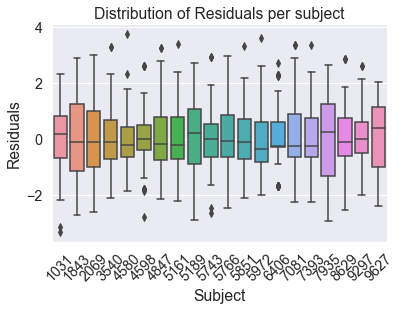

In [40]:
ax = sns.boxplot(x = model_LM.model.groups, y = model_LM.resid)

ax.set_title("Distribution of Residuals per subject")
ax.set_ylabel("Residuals")
ax.set_xlabel("Subject")
plt.xticks(rotation = 45)

In [41]:
df['AgentCat_ItemCat'] =  df['avatarCategory'] + '_' + df['itemCategory']
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID,AgentCat_ItemCat
0,1,Remember_01_CmA,1,9627,False,Active,Remember,01,Active_Remember
1,1,Realistic_01_CmA,5,9627,False,Active,Realistic,01,Active_Realistic
2,1,Attractive_01_CmA,1,9627,False,Active,Attractive,01,Active_Attractive
3,2,Remember_29_Sa,1,9627,True,Passive,Remember,29,Passive_Remember
4,2,Realistic_29_Sa,4,9627,True,Passive,Realistic,29,Passive_Realistic


In [42]:
df_Dunn = df[['AgentCat_ItemCat', 'likert']]

In [43]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_Dunn, val_col='likert', group_col='AgentCat_ItemCat', p_adjust = 'bonferroni')
posthoc

def highlight_sig(s):
    is_sig = s < 0.0019
    return ['background-color: cyan' if v else '' for v in is_sig]
posthoc.style.apply(highlight_sig)

,Active_Attractive,Active_Realistic,Active_Remember,Passive_Attractive,Passive_Realistic,Passive_Remember
Active_Attractive,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Active_Realistic,0.000000,1.000000,0.026893,0.000000,0.000000,0.000000
Active_Remember,0.000000,0.026893,1.000000,0.000000,0.164065,0.000000
Passive_Attractive,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Passive_Realistic,0.000000,0.000000,0.164065,0.000000,1.000000,0.000000
Passive_Remember,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
